0.25%
0.62%


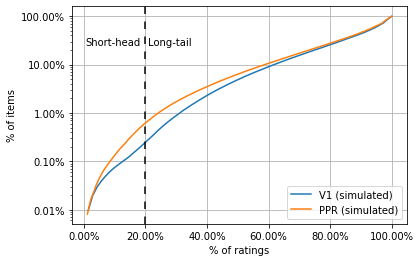

In [6]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_ratios(df):
    df = df[['userId', 'uri']].groupby('uri')['uri']\
        .agg(count='count').sort_values('count', ascending=False)
    item_percentages = [i / len(df) for i in range(1, len(df) + 1)]
    counts = list(df['count'])
    
    total_count = sum(counts)
    cum_sum = np.cumsum(counts)
    
    rating_percentages = [cum / total_count for cum in cum_sum]
    
    for index, percentage in enumerate(rating_percentages):
        if percentage >= 0.2:
            print(f'{item_percentages[index] * 100:.2f}%')
            break
    
    return rating_percentages, item_percentages

f, ax = plt.subplots()

ratings_file = json.load(open('../data/overview.json', 'r'))
for name, file in ratings_file.items():
    plt.plot(*get_ratios(pd.read_csv(file)), label=name)

plt.yscale('log')

y_values = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in y_values])

x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(x) for x in x_values])

plt.legend()
plt.xlabel('% of ratings')
plt.ylabel('% of items')
plt.axvline(x=0.2, color='black', dashes=[5, 5])
plt.text(0.21,0.25,'Long-tail',rotation=0)
plt.text(0.005,0.25,'Short-head',rotation=0)
plt.grid()
plt.savefig('figures/long_tail.pdf', bbox_inches='tight')
plt.show()